In [1]:
import sys
sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from meltsplotter import MELTSplotter
import sys, os
import shutil
import itertools
%matplotlib inline
import time
import random
import pyMELTScalc as M
import re
from matplotlib.cm import get_cmap
from cmcrameri import cm
import Thermobar as pt
import distinctipy
import PySulfSat as ss

Purpose of this notebook is for plotting up the results of our model from: 
http://localhost:8888/notebooks/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/Yasur%20Modelling%201.2.0%20with%20CO2%20%2B%20Model%20Comparisons%20%2B%20PEC%20plots.ipynb

and 

http://localhost:8888/notebooks/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/S%20total%20tests.ipynb

In [23]:
#ONEILL_df = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/Apriledit_MetalModel_noCO2_ONEILL.xlsx')
ONEILL_df = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/Apriledit_MetalModel_noCO2_ONEILL_changed_Metali_newest.xlsx')

#JUGO_df = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/Apriledit_MetalModel_noCO2_JUGO.xlsx')
JUGO_df = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/Apriledit_MetalModel_noCO2_JUGO_changed_Metali_newest.xlsx')

ONEILL_fromFe3_df = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/Apriledit_MetalModel_noCO2_ONEILL_old_Metali_newest.xlsx')


In [24]:
JUGO_df[['S_total_lizJUGO','melt_S_sulf','fluid_S','solid_S']].head()

,S_total_lizJUGO,melt_S_sulf,fluid_S,solid_S
0,1203.524517,1500.000000,0.0,296.475483
1,1187.503666,1508.911460,0.0,321.407795
2,1171.594350,1517.811154,0.0,346.216805
3,1155.822483,1526.643605,0.0,370.821122
4,1140.188345,1535.408831,0.0,395.220486


In [25]:
ONEILL_df[['S_total_lizOM','melt_S_sulf','fluid_S','solid_S']].head()

,S_total_lizOM,melt_S_sulf,fluid_S,solid_S
0,1244.654887,1500.000000,0.0,255.345113
1,1228.779944,1508.911460,0.0,280.131517
2,1213.005998,1517.811154,0.0,304.805157
3,1197.352148,1526.643605,0.0,329.291457
4,1181.818542,1535.408831,0.0,353.590289


In [26]:
ONEILL_fromFe3_df[['S_total_lizOM_fromFe3','melt_S_sulf','fluid_S','solid_S']].head()

,S_total_lizOM_fromFe3,melt_S_sulf,fluid_S,solid_S
0,2084.147309,1500.000000,0.0,0.0
1,2048.554125,1508.911460,0.0,0.0
2,2013.802549,1517.811154,0.0,0.0
3,1979.874997,1526.643605,0.0,0.0
4,1946.749862,1535.408831,0.0,0.0


In [54]:
# reds color dict for Jugo 
reds = ['#ff80b3','#99003d','#4d001f','#e6005c', '#330014','#800033','#ff3385']
jugo_dict = dict(zip(JUGO_df.newcolumn.unique(),reds))
# blues color dict for ONeill
blues =[ '#b3d9ff','#b3ecff','#0059b3','#1a8cff','#0086b3','#00264d','#001a33']
om_dict = dict(zip(ONEILL_df.newcolumn.unique(),blues))
# greens color dict for ONeill PW
greens =[ '#006600','#00cc00','#66cc66','#c6ecc6','#53c68c','#133926','#b3e6cc']
omnew_dict = dict(zip(ONEILL_fromFe3_df.newcolumn.unique(),greens))

# dict for linestyle
pressure = ONEILL_df['pressure_bar'].unique()
lines = ['solid', 'dashdot', 'dashed']
pdict = dict(zip(pressure, lines))

# Major Element Systematics

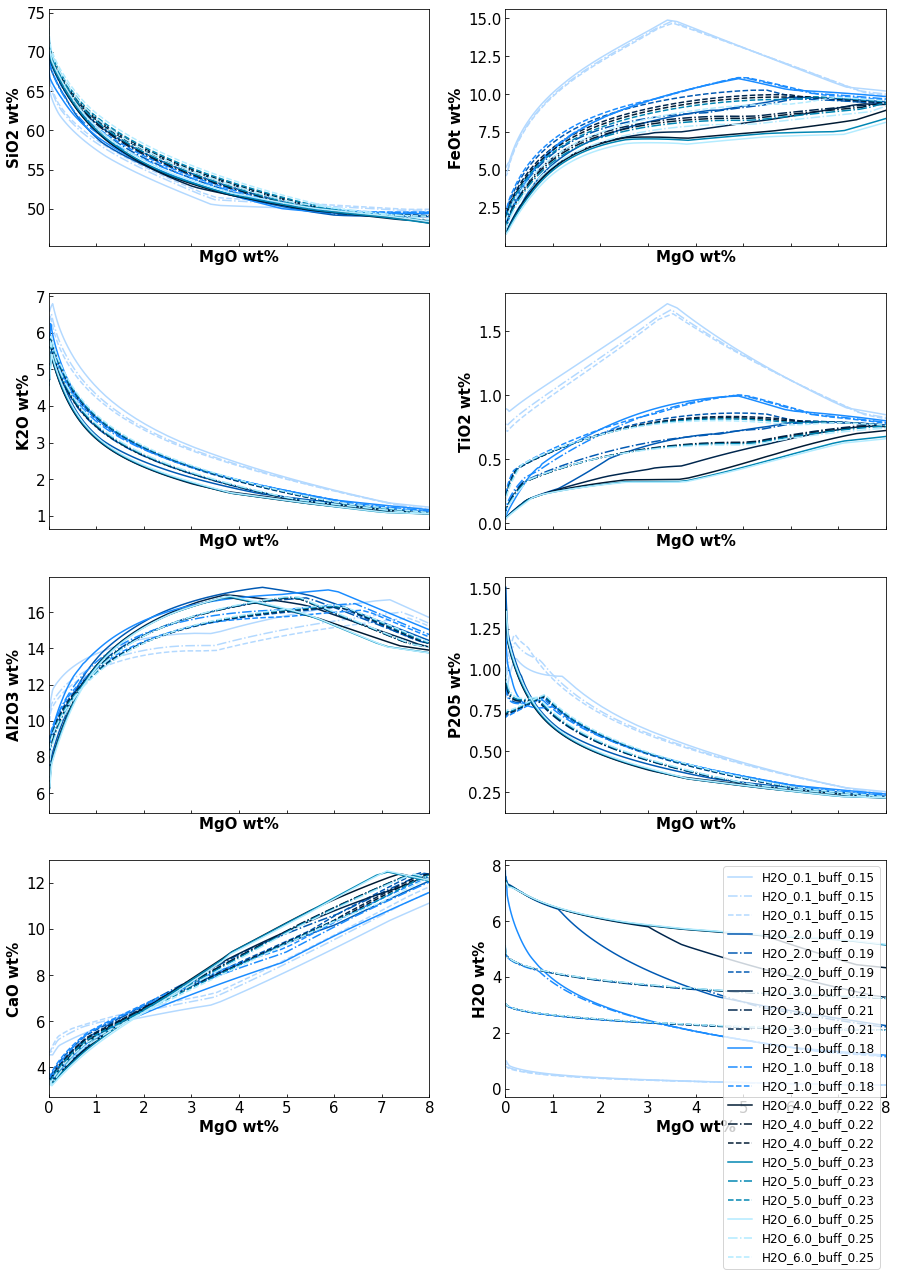

In [33]:
fig, ax = plt.subplots(4,2, sharex = True)
fig.set_figheight(20)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['H2O_Liq'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,1].legend()
ax = ax.flatten()
for i in range(8):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,8)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=15, weight='bold')
    if i == 7:
        ax[i].set_ylabel('H2O wt%', fontsize=15, weight='bold')

 

# Fluid systematics 

In [34]:
play2 = ONEILL_df.copy()

{2000: 'solid', 1000: 'dashdot', 500: 'dashed'}


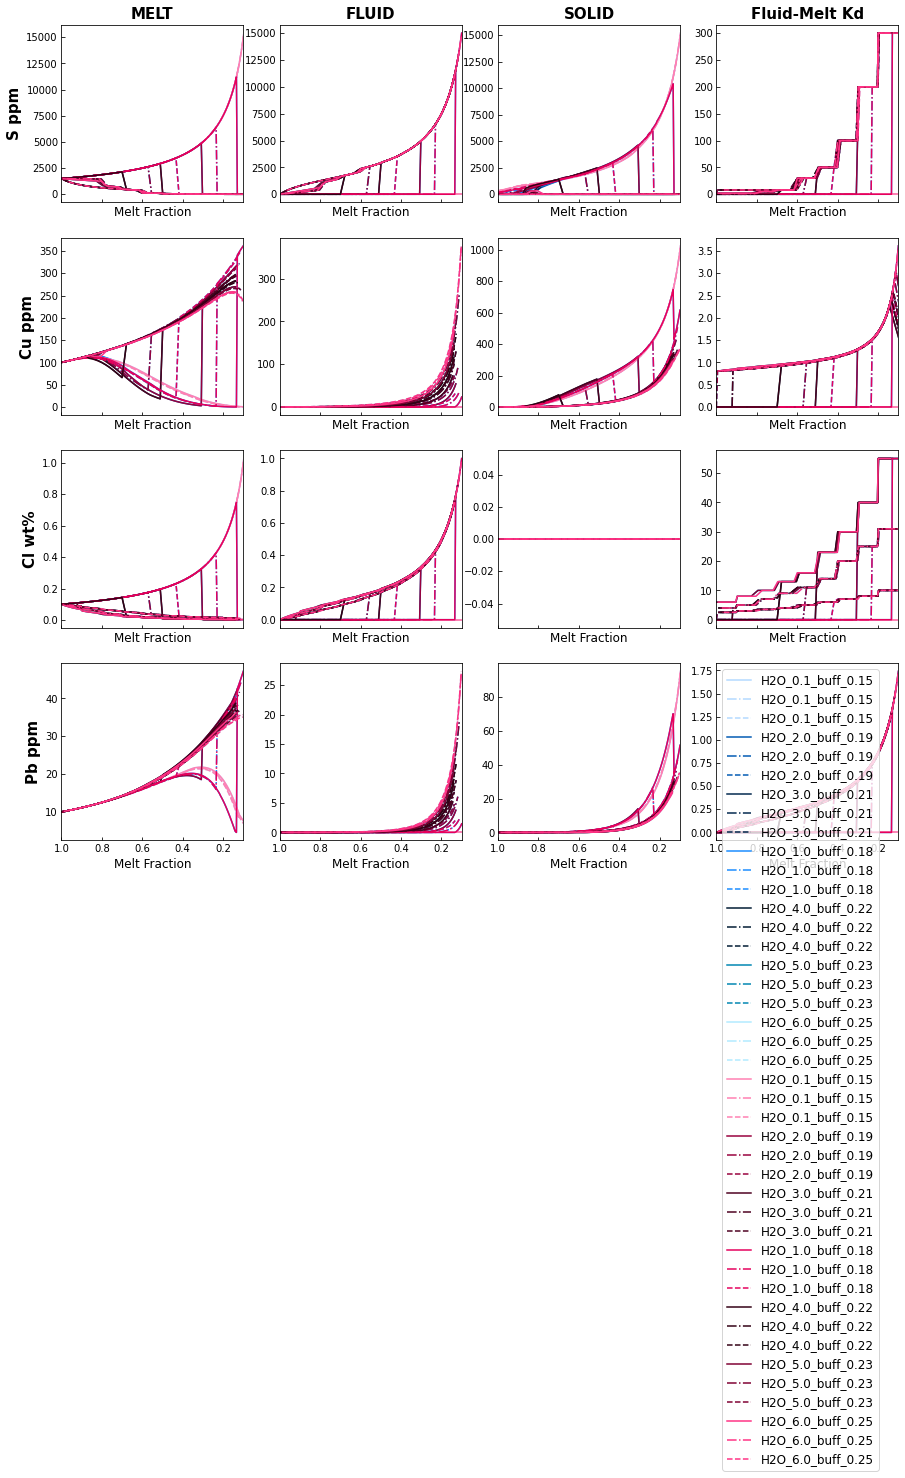

In [36]:
# Metal concentration plots using Oneill PW and Jugo 
fig, ax = plt.subplots(4,4, sharex = True)
ax[0,0].invert_xaxis()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

print(pdict)

for v in ONEILL_df.newcolumn.unique():
    df_v = play2[play2.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['melt_f']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_S'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,2].plot(x, df_vp['solid_S'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['melt_Cu'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['fluid_Cu'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,2].plot(x, df_vp['solid_Cu'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['melt_Cl'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['fluid_Cl'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[2,2].plot(x, df_vp['solid_Cl'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['melt_Pb'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['fluid_Pb'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,2].plot(x, df_vp['solid_Pb'], color=om_dict[v], label=v, linestyle=pdict[p])
        
        #Fluid-Melt Partitioning behaviour
        ax[0,3].plot(x, df_vp['bulk_DS'], color=om_dict[v], label='DS', linestyle=pdict[p])
        ax[2,3].plot(x, df_vp['bulk_DCl'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,3].plot(x, df_vp['bulk_DCu_fm'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,3].plot(x, df_vp['bulk_DPb_fm'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[3,3].legend()

for v in JUGO_df.newcolumn.unique():
    df_v = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['melt_f']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_S'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[0,2].plot(x, df_vp['solid_S'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['melt_Cu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['fluid_Cu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[1,2].plot(x, df_vp['solid_Cu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['melt_Cl'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['fluid_Cl'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[2,2].plot(x, df_vp['solid_Cl'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['melt_Pb'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['fluid_Pb'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[3,2].plot(x, df_vp['solid_Pb'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        
        #Fluid-Melt Partitioning behaviour
        ax[0,3].plot(x, df_vp['bulk_DS'], color=jugo_dict[v], label='DS', linestyle=pdict[p])
        ax[2,3].plot(x, df_vp['bulk_DCl'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[1,3].plot(x, df_vp['bulk_DCu_fm'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[3,3].plot(x, df_vp['bulk_DPb_fm'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[3,3].legend()    
        
ax = ax.flatten()
for i in range(16):
    ax[i].tick_params(axis='both', which='both', labelsize=10, direction='in')
    ax[i].set_xlim(1,0.1)
    ax[i].set_xlabel('Melt Fraction', fontsize=12,weight='normal')
    if i == 0:
        ax[i].set_ylabel('S ppm', fontsize=15, weight='bold')
        ax[i].set_title('MELT', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Cu ppm', fontsize=15, weight='bold')
    if i == 8:
        ax[i].set_ylabel('Cl wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_title('FLUID', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_title('SOLID', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_title('Fluid-Melt Kd', fontsize=15, weight='bold')
    if i == 12:
        ax[i].set_ylabel('Pb ppm', fontsize=15, weight='bold')

# Investigating the difference in S tot modelled

In [37]:
ONEILL_df.newcolumn.unique()

array(['H2O_0.1_buff_0.15', 'H2O_2.0_buff_0.19', 'H2O_3.0_buff_0.21',
       'H2O_1.0_buff_0.18', 'H2O_4.0_buff_0.22', 'H2O_5.0_buff_0.23',
       'H2O_6.0_buff_0.25'], dtype=object)

In [38]:
ONEILL_fromFe3_df

,Unnamed: 0,T_C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,FeO_Liq,FeOt_Liq,MnO_Liq,...,bulk_DSe_xxm,bulk_DSe_phasem,bulk_DSe_xxm_Peach,bulk_DSe_phasem_Peach,bulk_Se_syst,melt_Se_raw,melt_Se,solid_Se,fluid_Se,massbal_se
0,0,1327.800000,48.947950,0.686465,12.833914,0.0,1.650774,8.422291,9.917007,0.198975,...,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,fail
1,1,1322.817460,48.997428,0.690543,12.910160,0.0,1.660582,8.409581,9.913177,0.198491,...,0.000000,0.000000,0.000000,0.000000,0.100594,0.101192,0.100594,0.0,0.000000,pass
2,2,1317.834921,49.046880,0.694606,12.986113,0.0,1.670351,8.396086,9.908528,0.197989,...,0.000000,0.000000,0.000000,0.000000,0.101187,0.102389,0.101187,0.0,0.000000,pass
3,3,1312.852381,49.096118,0.698638,13.061488,0.0,1.680046,8.381863,9.903084,0.197471,...,0.000000,0.000000,0.000000,0.000000,0.101776,0.103584,0.101776,0.0,0.000000,pass
4,4,1307.869841,49.145142,0.702639,13.136286,0.0,1.689667,8.366919,9.896851,0.196939,...,0.000000,0.000000,0.000000,0.000000,0.102361,0.104777,0.102361,0.0,0.000000,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,2086,785.290991,73.235375,0.148683,7.014109,0.0,0.055513,1.376598,1.426862,0.372440,...,0.000000,2.626937,0.000000,2.626937,0.902521,0.368877,0.040872,0.0,0.861649,pass
2087,2087,780.273874,73.517895,0.140491,6.818679,0.0,0.050059,1.325213,1.370539,0.380748,...,0.000000,2.629487,0.000000,2.629487,0.922756,0.376190,0.040768,0.0,0.881988,fail
2088,2088,775.256757,73.797632,0.132689,6.630334,0.0,0.044633,1.267791,1.308205,0.388905,...,0.000000,2.631867,0.000000,2.631867,0.942630,0.383378,0.040671,0.0,0.901958,fail
2089,2089,770.239640,74.057025,0.125052,6.439050,0.0,0.038507,1.196689,1.231555,0.399685,...,0.000000,2.635036,0.000000,2.635036,0.968865,0.392845,0.040547,0.0,0.928318,fail


KeyError: 'H2O_4.0_buff_0.21'

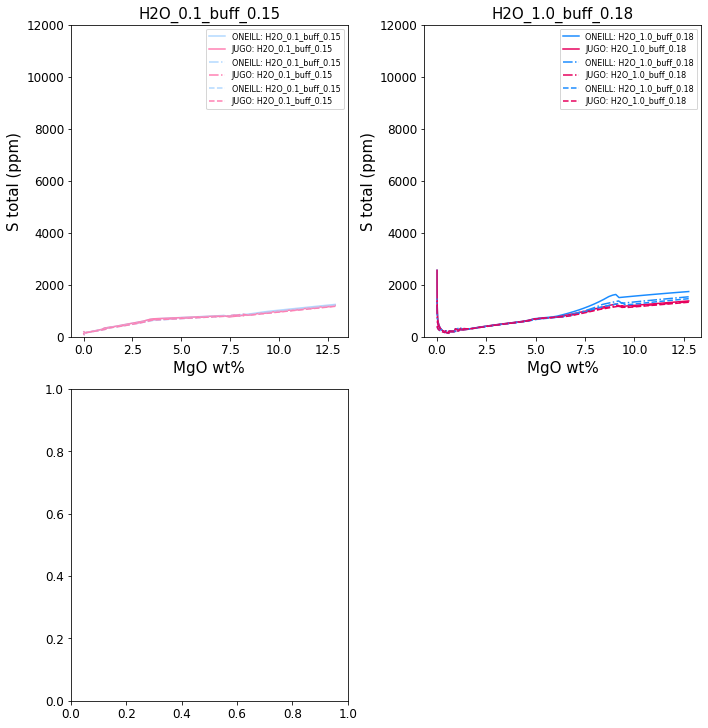

In [39]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

# Plotting OM dataset
category = ['H2O_0.1_buff_0.15','H2O_1.0_buff_0.18', 'H2O_4.0_buff_0.21', 'H2O_6.0_buff_0.25']
subcat = ONEILL_df.pressure_bar.unique()
numbers = list(range(1,5))
sub = zip(category, numbers)

for c,num in sub:
    dfi = (ONEILL_df[ONEILL_df.newcolumn == c])
    dfj = (JUGO_df[JUGO_df.newcolumn ==c])
    ax = fig.add_subplot(2,2,num)
    for i in subcat:
        dfh = dfi[dfi.pressure_bar == i]
        df = dfj[dfj.pressure_bar == i]
        x = dfh['MgO_Liq']
        y = dfh['S_total_lizOM']
        a = df['MgO_Liq']
        b = df['S_total_lizJUGO']
        ax.plot(x,y, color=om_dict[c], linestyle=pdict[i], label='ONEILL: '+c)
        ax.plot(a,b, color=jugo_dict[c], linestyle=pdict[i], label='JUGO: '+c)
        ax.set_title(c, fontsize=15)
        ax.set_ylim(0,12000)
    ax.set_xlabel('MgO wt%', fontsize=15)
    ax.set_ylabel('S total (ppm)', fontsize=15)
    ax.legend(fontsize=8)
    fig.tight_layout()


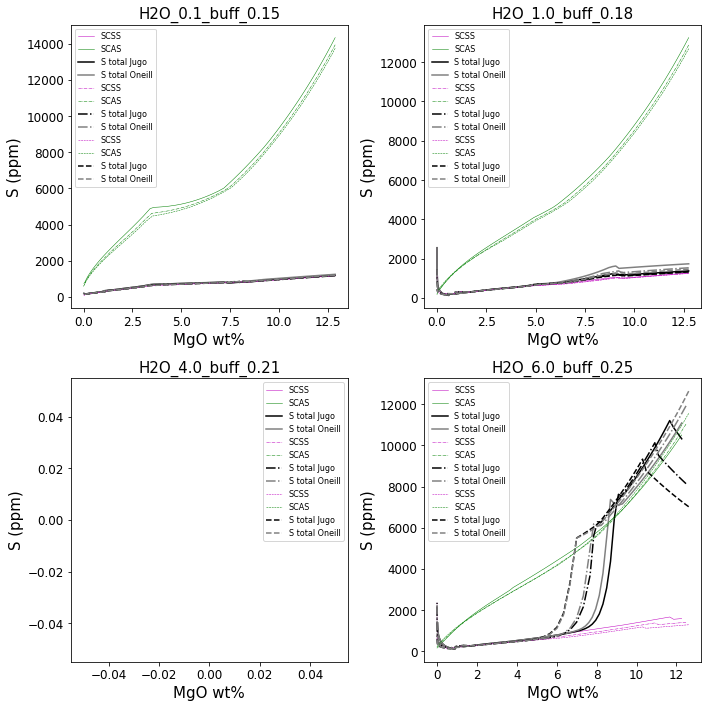

In [40]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

# Plotting OM dataset
category = ['H2O_0.1_buff_0.15','H2O_1.0_buff_0.18', 'H2O_4.0_buff_0.21', 'H2O_6.0_buff_0.25']
subcat = ONEILL_df.pressure_bar.unique()
numbers = list(range(1,5))
sub = zip(category, numbers)

for c,num in sub:
    dfi = (ONEILL_df[ONEILL_df.newcolumn == c])
    dfj = (JUGO_df[JUGO_df.newcolumn ==c])
    ax = fig.add_subplot(2,2,num)
    for i in subcat:
        dfh = dfi[dfi.pressure_bar == i]
        df = dfj[dfj.pressure_bar == i]
        x = dfh['MgO_Liq']
        y = dfh['SCSS']
        a = df['MgO_Liq']
        b = df['SCAS']
        ax.plot(x,y, color='m', linestyle=pdict[i],lw=0.5, label='SCSS')
        ax.plot(a,b, color='g', linestyle=pdict[i],lw=0.5, label='SCAS')
        ax.plot(x,dfh['S_total_lizJUGO'], color='k', linestyle=pdict[i], label='S total Jugo')
        ax.plot(x,dfh['S_total_lizOM'], color='grey', linestyle=pdict[i], label='S total Oneill')
        ax.set_title(c, fontsize=15)
        
    ax.set_xlabel('MgO wt%', fontsize=15)
    ax.set_ylabel('S (ppm)', fontsize=15)
    ax.legend(fontsize=8)
    fig.tight_layout()


## questions i need to answer:
 - what causes S to increase from 12-10 wt% MgO in 6wt% run
 - why does S total exceed that calculated for SCAS which should be the S maximum in 6 wt% H2O case
 - why are ONeill and Jugo giving such different S total calculations - answered

In [41]:
JUGO_df.columns[80:100]

Index(['mass_Sp_cumulative_NORM_ppn1',
       'mass_whitlockite1_cumulative_NORM_ppn1',
       'mass_Apa_cumulative_NORM_ppn1', 'mass_Sp2_cumulative_NORM_ppn1',
       'mass_Cpx2_cumulative_NORM_ppn1', 'mass_rutile1_cumulative_NORM_ppn1',
       'mass_Kspar_cumulative_NORM_ppn1', 'mass_leucite1_cumulative_NORM_ppn1',
       'mass_Rhm_cumulative_NORM_ppn1', 'mass_tridymite1_cumulative_NORM_ppn1',
       'mass_solidphase_NORMcumu_ppn1', 'mass_fluid1_cumulative_NORM_ppn1',
       'DeltaQFM_OMbuff', 'DeltaQFM_OM_fromFe3', 'DeltaQFM_JUGO',
       'DeltaQFM_frostbuff', 'S_total_lizOM', 'S_total_lizOM_fromFe3',
       'S_total_lizJUGO', 'S6St_lizOM'],
      dtype='object')

In [42]:
ONEILL_df.newcolumn.unique()

array(['H2O_0.1_buff_0.15', 'H2O_2.0_buff_0.19', 'H2O_3.0_buff_0.21',
       'H2O_1.0_buff_0.18', 'H2O_4.0_buff_0.22', 'H2O_5.0_buff_0.23',
       'H2O_6.0_buff_0.25'], dtype=object)

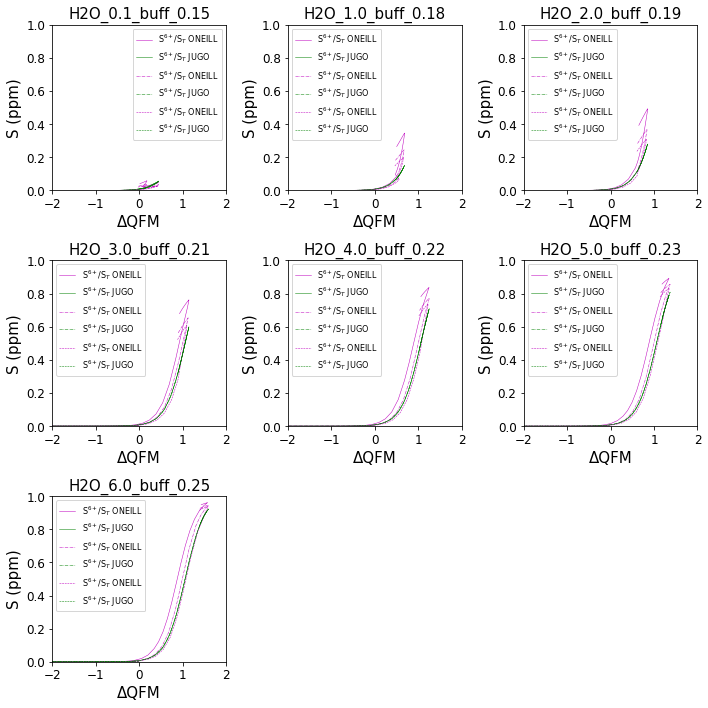

In [44]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

# Plotting OM dataset
category = ['H2O_0.1_buff_0.15','H2O_1.0_buff_0.18', 'H2O_2.0_buff_0.19', 'H2O_3.0_buff_0.21',
       'H2O_4.0_buff_0.22', 'H2O_5.0_buff_0.23','H2O_6.0_buff_0.25']
subcat = ONEILL_df.pressure_bar.unique()
numbers = list(range(1,8))
sub = zip(category, numbers)

for c,num in sub:
    dfi = (ONEILL_df[ONEILL_df.newcolumn == c])
    dfj = (JUGO_df[JUGO_df.newcolumn ==c])
    ax = fig.add_subplot(3,3,num)
    for i in subcat:
        dfh = dfi[dfi.pressure_bar == i]
        df = dfj[dfj.pressure_bar == i]
        x = dfh['DeltaQFM_frostbuff']#dfh['DeltaQFM']
        y = dfh['S6St_lizOM']
        a = dfh['DeltaQFM_frostbuff']#dfh['DeltaQFM']
        b = df['S6St_lizJUGO']
        ax.plot(x,y, color='m', linestyle=pdict[i],lw=0.5, label='S$^{6+}$/S$_{T}$ ONEILL')
        ax.plot(a,b, color='g', linestyle=pdict[i],lw=0.5, label='S$^{6+}$/S$_{T}$ JUGO')
        #ax.plot(x,dfh['S_total_lizJUGO'], color='k', linestyle=pdict[i], label='S total Jugo')
        #ax.plot(x,dfh['S_total_lizOM'], color='grey', linestyle=pdict[i], label='S total Oneill')
        ax.set_title(c, fontsize=15)
        ax.set_xlim(-2,2)
        ax.set_ylim(0,1)
    ax.set_xlabel('ΔQFM', fontsize=15)
    ax.set_ylabel('S (ppm)', fontsize=15)
    ax.legend(fontsize=8)
    fig.tight_layout()


## Sulfur systematics

plotting S evolution in the melt, solid and fluid and S6+/St ratio for both Jugo and O'Neill

In [45]:
#isolating a certain system for analysis detail
#just_1 = ONEILL_df[ONEILL_df.newcolumn.isin(['H2O_1.0_buff_0.18'])]
#just_1.to_excel('metalmodel_check_1h2o_april.xlsx')

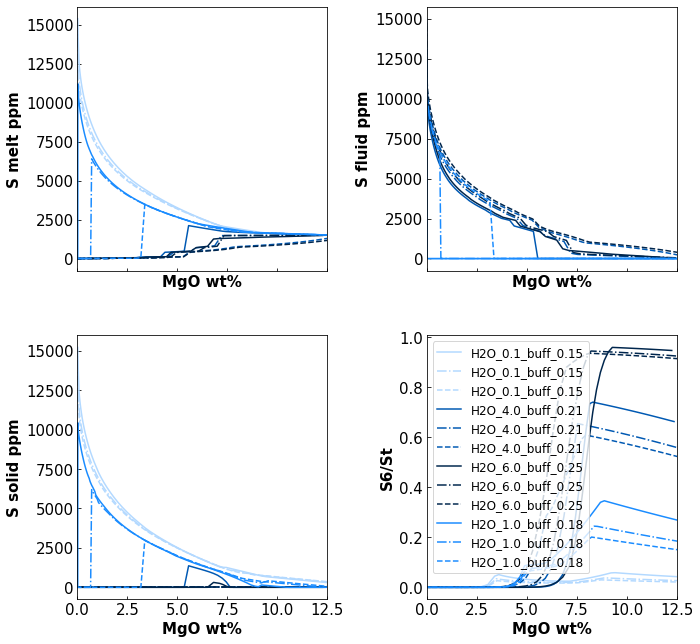

In [51]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_S'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['solid_S'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['S6St_lizOM'], color=om_dict[v], label=v, linestyle=pdict[p])
        
        #ax[0,0].plot(x, df_jp['melt_S_sulf'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[0,1].plot(x, df_jp['fluid_S'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,0].plot(x, df_jp['solid_S'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['S6St_lizJUGO'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].legend()
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('S melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('S fluid ppm', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('S solid ppm', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('S6/St', fontsize=15, weight='bold')





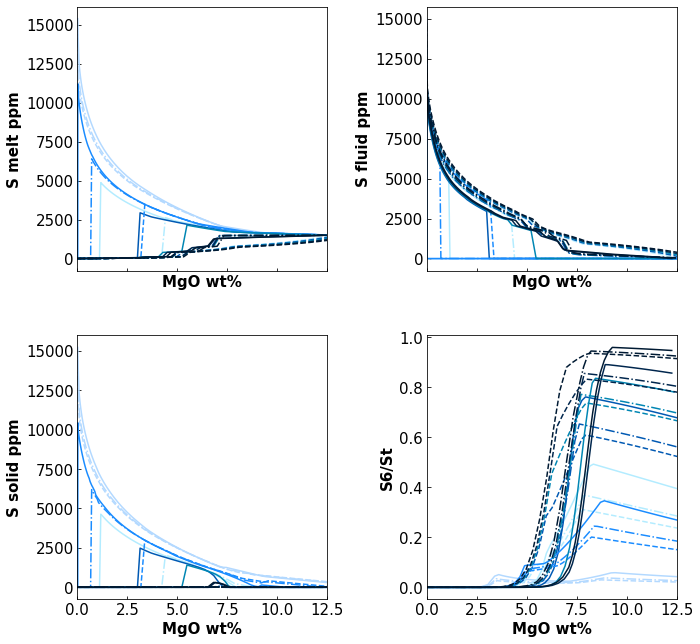

In [56]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_S'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['solid_S'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['S6St_lizOM'], color=om_dict[v], label=v, linestyle=pdict[p])
        
        #ax[0,0].plot(x, df_jp['melt_S_sulf'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[0,1].plot(x, df_jp['fluid_S'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,0].plot(x, df_jp['solid_S'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['S6St_lizJUGO'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].legend()
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('S melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('S fluid ppm', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('S solid ppm', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('S6/St', fontsize=15, weight='bold')





In [49]:
ONEILL_df.columns[200:]

Index(['DMo_s/m.4', 'DZn_s/m.4', 'DPb_s/m.4', 'DCu_s/m.4', 'DAg_s/m.4',
       'DAu_s/m.4', 'DMo_mss/m.4', 'DZn_mss/m.4', 'DPb_mss/m.4', 'DCu_mss/m.4',
       'DAg_mss/m.4', 'DAu_mss/m.4', 'h2o_mass_fluid1', 'Cl_mass_fluid1',
       'S_mass_fluid1', 'XH2O_fluid1', 'XNaCl_fluid1', 'XH2S_fluid1', 'DCu_fm',
       'bulk_DCu_fm', 'X_fluid1_system', 'X_solid_system', 'bulk_DCu_xxm',
       'bulk_DCu_phasem', 'bulk_DCu_xxm_mss', 'bulk_DCu_phasem_mss',
       'bulk_Cu_syst', 'melt_Cu_raw', 'melt_Cu', 'solid_Cu', 'fluid_Cu',
       'melt_Cu_raw_mss', 'melt_Cu_mss', 'solid_Cu_mss', 'fluid_Cu_mss',
       'DPb_fm', 'bulk_DPb_fm', 'bulk_DPb_xxm', 'bulk_DPb_phasem',
       'bulk_DPb_xxm_mss', 'bulk_DPb_phasem_mss', 'bulk_Pb_syst',
       'melt_Pb_raw', 'melt_Pb', 'solid_Pb', 'fluid_Pb', 'melt_Pb_raw_mss',
       'melt_Pb_mss', 'solid_Pb_mss', 'fluid_Pb_mss', 'massbal_pb', 'DAg_fm',
       'bulk_DAg_fm', 'bulk_DAg_xxm', 'bulk_DAg_phasem', 'bulk_DAg_xxm_mss',
       'bulk_DAg_phasem_mss', 'bulk_Ag_s

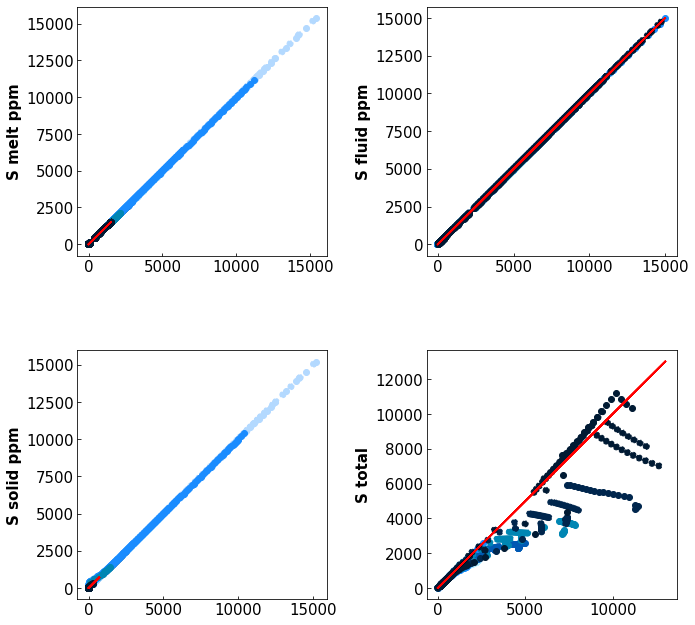

In [57]:
fig, ax = plt.subplots(2,2, sharex = False)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['melt_S_sulf']
        y = df_jp['melt_S_sulf']
        
        a = df_vp['fluid_S']
        b = df_jp['fluid_S'] 
        
        c = df_vp['solid_S']
        d = df_jp['solid_S'] 
        
        e = df_vp['S_total_lizOM']
        f = df_jp['S_total_lizJUGO'] 
        ax[0,0].scatter(x,y, color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].scatter(a,b, color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].scatter(c,d, color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].scatter(e,f, color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,0].plot([0,1500], [0,1500], c='r')
        ax[0,1].plot([0,15000], [0,15000], c='r')
        ax[1,0].plot([0,700], [0,700], c='r')
        ax[1,1].plot([0,13000], [0,13000], c='r')
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    
    #ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('S melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('S fluid ppm', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('S solid ppm', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('S total', fontsize=15, weight='bold')



S total a slightly different depending on whether we chose Jugo or OM model but looks like negligible impact on S systematics, but how so?

# Copper Systematics

In [60]:
ONEILL_df.columns[140:150]

Index(['logDMo_s/m', 'logDZn_s/m', 'logDPb_s/m', 'logDCu_s/m', 'logDAg_s/m',
       'logDAu_s/m', 'logDMo_mss/m', 'logDZn_mss/m', 'logDPb_mss/m',
       'logDCu_mss/m'],
      dtype='object')

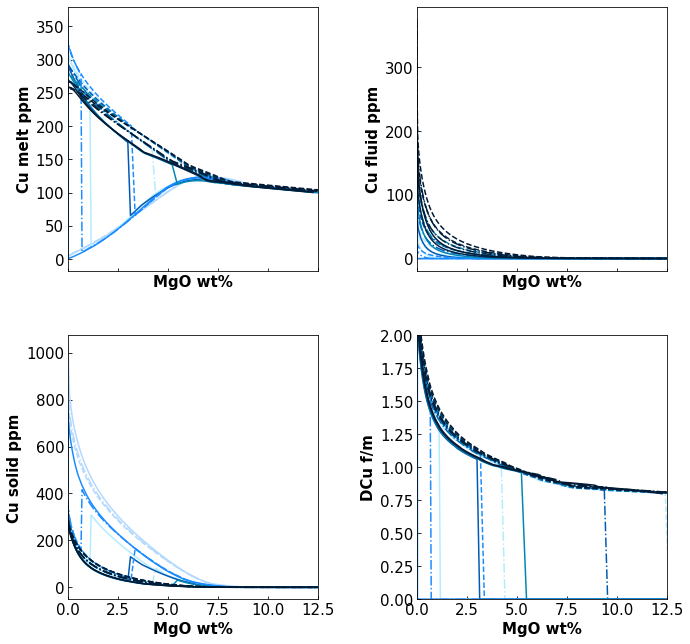

In [64]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_Cu_mss'], color=om_dict[v], label=p, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_Cu_mss'], color=om_dict[v], label=p, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['solid_Cu_mss'], color=om_dict[v], label=p, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['bulk_DCu_fm'], color=om_dict[v], label=p, linestyle=pdict[p])
        #ax[1,1].plot(x, df_vp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].legend()
        #ax[0,0].plot(x, df_jp['melt_Cu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[0,1].plot(x, df_jp['fluid_Cu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,0].plot(x, df_jp['solid_Cu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DCu_fm'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('Cu melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('Cu fluid ppm', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('Cu solid ppm', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('DCu f/m', fontsize=15, weight='bold')
        ax[i].set_ylim(0,2)





# Au systematics

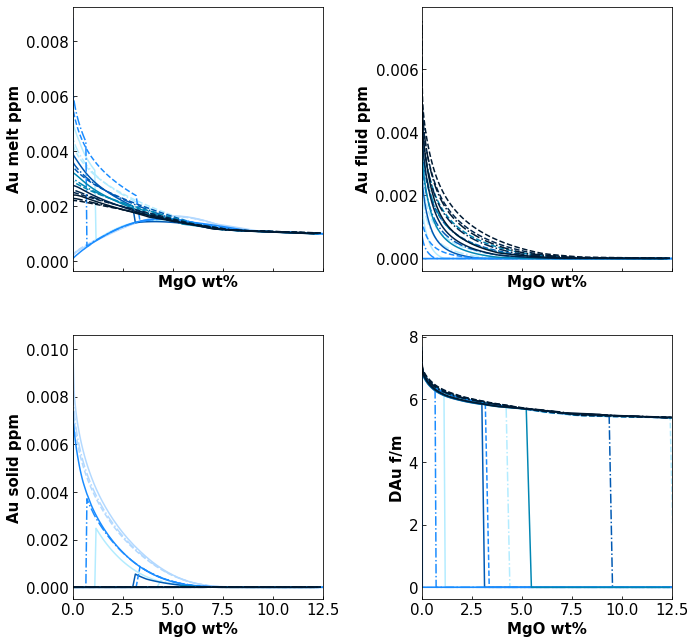

In [65]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_Au_mss'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_Au_mss'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['solid_Au_mss'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['bulk_DAu_fm'], color=om_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_vp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        
       #ax[0,0].plot(x, df_jp['melt_Au'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[0,1].plot(x, df_jp['fluid_Au'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,0].plot(x, df_jp['solid_Au'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DAu_fm'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('Au melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('Au fluid ppm', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('Au solid ppm', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('DAu f/m', fontsize=15, weight='bold')
        #ax[i].set_ylim(0,20)





# Ag systematics

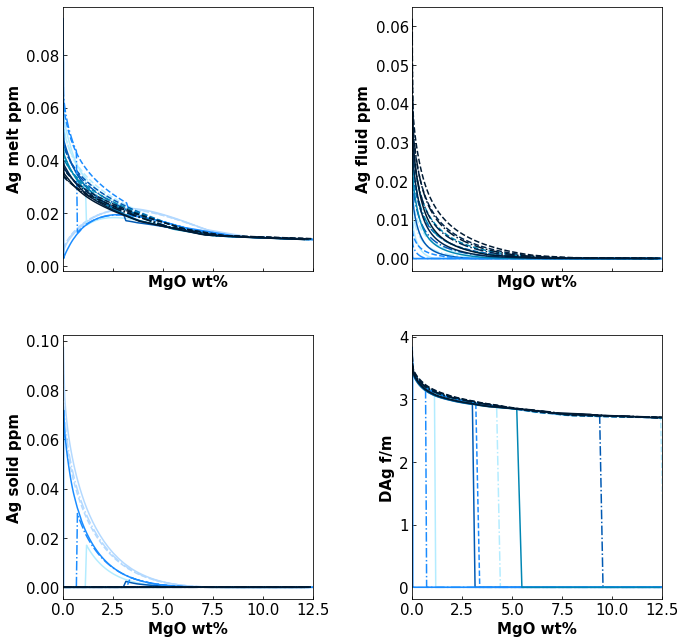

In [66]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_Ag_mss'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_Ag_mss'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['solid_Ag_mss'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['bulk_DAg_fm'], color=om_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_vp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        
        #ax[0,0].plot(x, df_jp['melt_Ag'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[0,1].plot(x, df_jp['fluid_Ag'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,0].plot(x, df_jp['solid_Ag'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DAg_fm'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('Ag melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('Ag fluid ppm', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('Ag solid ppm', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('DAg f/m', fontsize=15, weight='bold')
        #ax[i].set_ylim(0,20)





# Se systematics

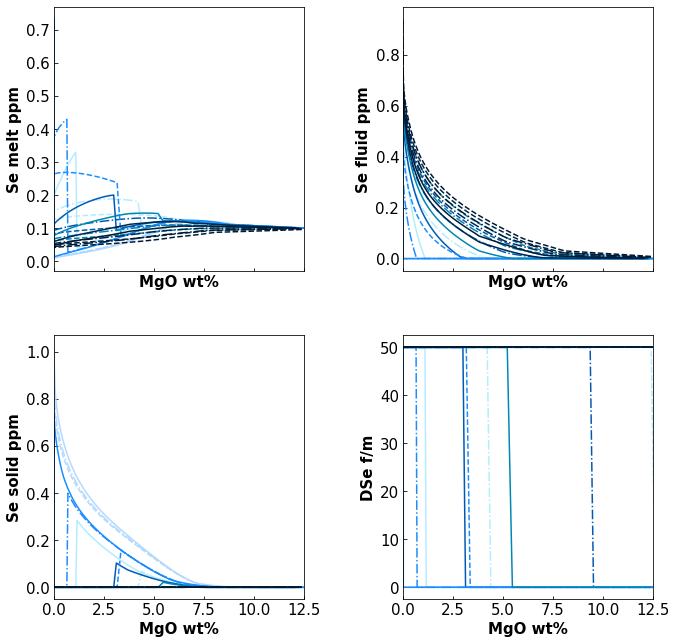

In [67]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_Se'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_Se'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['solid_Se'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['bulk_DSe_fm'], color=om_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_vp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        
        #ax[0,0].plot(x, df_jp['melt_Se'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[0,1].plot(x, df_jp['fluid_Se'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,0].plot(x, df_jp['solid_Se'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DSe_fm'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_jp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('Se melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('Se fluid ppm', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('Se solid ppm', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('DSe f/m', fontsize=15, weight='bold')
        #ax[i].set_ylim(0,20)





## What are we looking for? 

- differences in metal evolutions 
- differences in evolution with respect to water 

# Metal Ratios...

In [70]:
ONEILL_df['CuAu'] = ONEILL_df['melt_Cu'] / ONEILL_df['melt_Au']
ONEILL_df['CuAg'] = ONEILL_df['melt_Cu'] / ONEILL_df['melt_Ag']
ONEILL_df['CuSe'] = ONEILL_df['melt_Cu'] / ONEILL_df['melt_Se']

JUGO_df['CuAu'] = JUGO_df['melt_Cu'] / JUGO_df['melt_Au']
JUGO_df['CuAg'] = JUGO_df['melt_Cu'] / JUGO_df['melt_Ag']
JUGO_df['CuSe'] = JUGO_df['melt_Cu'] / JUGO_df['melt_Se']

#ONEILL_df['CuAu'] = ONEILL_df['melt_Cu_mss'] / ONEILL_df['melt_Au_mss']
#ONEILL_df['CuAg'] = ONEILL_df['melt_Cu_mss'] / ONEILL_df['melt_Ag_mss']
#ONEILL_df['CuSe'] = ONEILL_df['melt_Cu_mss'] / ONEILL_df['melt_Se']

#JUGO_df['CuAu'] = JUGO_df['melt_Cu_mss'] / JUGO_df['melt_Au_mss']
#JUGO_df['CuAg'] = JUGO_df['melt_Cu_mss'] / JUGO_df['melt_Ag_mss']
#JUGO_df['CuSe'] = JUGO_df['melt_Cu_mss'] / JUGO_df['melt_Se']

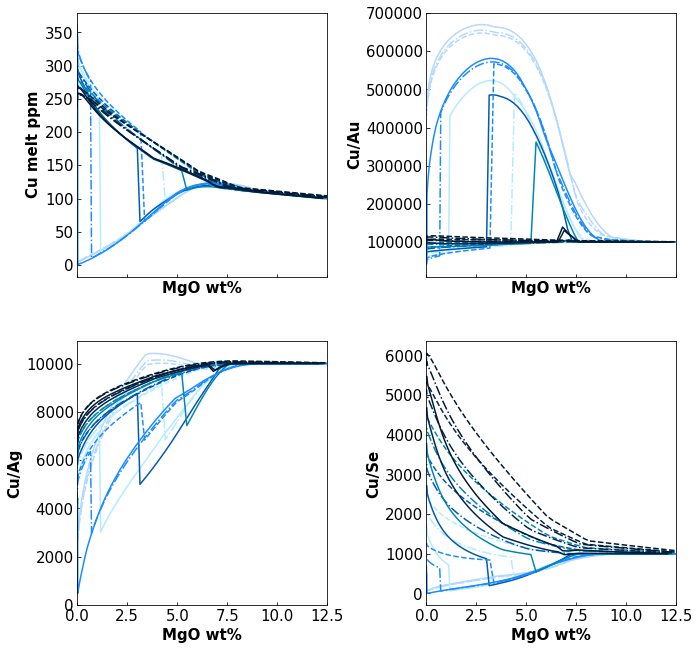

In [71]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_Cu_mss'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['CuAu'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['CuAg'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['CuSe'], color=om_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_vp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].legend()
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('Cu melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('Cu/Au', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('Cu/Ag', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('Cu/Se', fontsize=15, weight='bold')
        #ax[i].set_ylim(0,20)





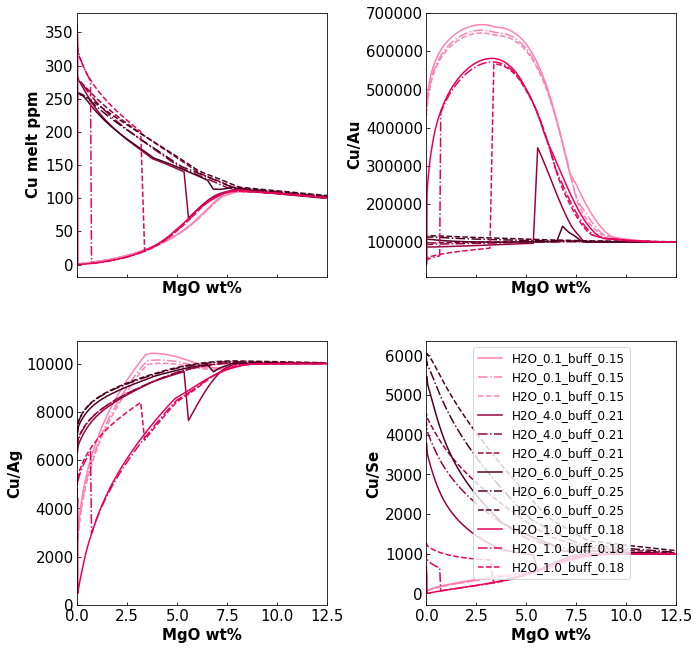

In [60]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_jp['melt_Cu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_jp['CuAu'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_jp['CuAg'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_jp['CuSe'], color=jugo_dict[v], label=v, linestyle=pdict[p])
        #ax[1,1].plot(x, df_vp['bulk_DCu_xxm'], color=om_dict[v], label=v, linestyle=pdict[p])
        ax[1,1].legend()
ax = ax.flatten()
for i in range(4):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('Cu melt ppm', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('Cu/Au', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('Cu/Ag', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('Cu/Se', fontsize=15, weight='bold')
        #ax[i].set_ylim(0,20)



### Plot Kds against melt F and pressure and water contents

In [61]:
ONEILL_df.columns[130:]

Index(['logDMo_s/m', 'logDZn_s/m', 'logDPb_s/m', 'logDCu_s/m', 'logDAg_s/m',
       'logDAu_s/m', 'DMo_s/m', 'DZn_s/m', 'DPb_s/m', 'DCu_s/m', 'DAg_s/m',
       'DAu_s/m', 'DMo_s/m.1', 'DZn_s/m.1', 'DPb_s/m.1', 'DCu_s/m.1',
       'DAg_s/m.1', 'DAu_s/m.1', 'h2o_mass_fluid1', 'Cl_mass_fluid1',
       'S_mass_fluid1', 'XH2O_fluid1', 'XNaCl_fluid1', 'XH2S_fluid1', 'DCu_fm',
       'bulk_DCu_fm', 'X_fluid1_system', 'X_solid_system', 'bulk_DCu_xxm',
       'bulk_DCu_phasem', 'bulk_Cu_syst', 'melt_Cu_raw', 'melt_Cu', 'solid_Cu',
       'fluid_Cu', 'massbal_cu', 'DPb_fm', 'bulk_DPb_fm', 'bulk_DPb_xxm',
       'bulk_DPb_phasem', 'bulk_Pb_syst', 'melt_Pb_raw', 'melt_Pb', 'solid_Pb',
       'fluid_Pb', 'massbal_pb', 'DAg_fm', 'bulk_DAg_fm', 'bulk_DAg_xxm',
       'bulk_DAg_phasem', 'bulk_Ag_syst', 'melt_Ag_raw', 'melt_Ag', 'solid_Ag',
       'fluid_Ag', 'massbal_ag', 'DAu_fm', 'bulk_DAu_fm', 'bulk_DAu_xxm',
       'bulk_DAu_phasem', 'bulk_Au_syst', 'melt_Au_raw', 'melt_Au', 'solid_Au',
       'fl

In [62]:
JUGO_df[['DMo_s/m','DZn_s/m','DPb_s/m','DCu_s/m','DAg_s/m','DAu_s/m']] #calc based on T and FeO
JUGO_df[['DMo_s/m','DZn_s/m','DPb_s/m','DCu_s/m','DAg_s/m','DAu_s/m']] #calc based on T and FeO


,DMo_s/m,DZn_s/m,DPb_s/m,DCu_s/m,DAg_s/m,DAu_s/m
0,1.537997,1.406013,24.592242,536.001831,707.922483,5684.458098
1,1.475766,1.389736,24.545244,545.652048,713.070794,5740.130425
2,1.415953,1.373684,24.499735,555.576490,718.298380,5797.083834
3,1.358457,1.357848,24.455658,565.783269,723.606483,5855.338136
4,1.303189,1.342225,24.412991,576.281611,728.996569,5914.921791
...,...,...,...,...,...,...
1175,0.140527,2.126398,90.123592,50337.997876,3140.191362,131055.971397
1176,0.140085,2.173621,92.817651,54260.868038,3213.321267,138435.830904
1177,0.141577,2.238647,96.104710,58828.672200,3291.979317,147016.201576
1178,0.147652,2.344862,100.693685,64569.444359,3380.577807,157942.385391


In [63]:
om_fm = ONEILL_df[['Unnamed: 0', 'T_C', 'SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'Cr2O3_Liq',
       'Fe2O3_Liq', 'FeO_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq',
       'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'CO2_Liq', 'Fe3Fet_Liq',
       'h_Liq', 'mass_Liq', 'v_Liq', 'rho_Liq', 'pressure_bar', 'newcolumn',
       'index','DCu_fm','DAg_fm','DAu_fm','DSe_fm']]

om_fm_piv = pd.melt(om_fm, id_vars=om_fm.columns[:25], value_vars =om_fm.columns[25:]).rename(columns = {'variable': 'Kd_fm', 'value': 'value'}, inplace = False)
om_fm_piv = om_fm_piv.dropna(subset=['value'])

om_fm_piv

,Unnamed: 0,T_C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,FeO_Liq,FeOt_Liq,MnO_Liq,...,Fe3Fet_Liq,h_Liq,mass_Liq,v_Liq,rho_Liq,pressure_bar,newcolumn,index,Kd_fm,value
115,115,1043.516822,49.856038,0.507956,15.876861,0.0,1.037484,6.650799,7.590203,0.238509,...,0.122990,-863598.036876,69.140166,29.297204,2.359958,2000,H2O_4.0_buff_0.21,38,DCu_fm,0.958124
116,116,1038.538318,50.130017,0.479488,16.052984,0.0,0.941586,6.675827,7.528398,0.246013,...,0.112538,-837810.307376,66.993344,28.446935,2.355029,2000,H2O_4.0_buff_0.21,39,DCu_fm,0.966238
117,117,1033.559813,50.403560,0.452953,16.212085,0.0,0.852277,6.696416,7.468121,0.253418,...,0.102686,-814047.092624,65.015462,27.662702,2.350293,2000,H2O_4.0_buff_0.21,40,DCu_fm,0.974031
118,118,1028.581308,50.674736,0.428233,16.356620,0.0,0.769510,6.712796,7.409559,0.260712,...,0.093447,-792125.842885,63.191089,26.938377,2.345765,2000,H2O_4.0_buff_0.21,41,DCu_fm,0.981544
119,119,1023.602804,50.942456,0.405250,16.489237,0.0,0.693252,6.724314,7.352029,0.267865,...,0.084845,-771877.519380,61.505637,26.268376,2.341433,2000,H2O_4.0_buff_0.21,42,DCu_fm,0.988807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,1175,785.290991,73.235375,0.148683,7.014109,0.0,0.055513,1.376598,1.426862,0.372440,...,0.035007,-149306.067555,11.168573,4.967231,2.248450,500,H2O_6.0_buff_0.25,94,DSe_fm,50.000000
4716,1176,780.273874,73.517895,0.140491,6.818679,0.0,0.050059,1.325213,1.370539,0.380748,...,0.032865,-146206.117065,10.924879,4.862278,2.246865,500,H2O_6.0_buff_0.25,95,DSe_fm,50.000000
4717,1177,775.256757,73.797632,0.132689,6.630334,0.0,0.044633,1.267791,1.308205,0.388905,...,0.030699,-143300.941382,10.695735,4.763761,2.245229,500,H2O_6.0_buff_0.25,96,DSe_fm,50.000000
4718,1178,770.239640,74.057025,0.125052,6.439050,0.0,0.038507,1.196689,1.231555,0.399685,...,0.028134,-139592.045536,10.407267,4.639086,2.243387,500,H2O_6.0_buff_0.25,97,DSe_fm,50.000000


In [73]:
#transpose data according to s/m values
ONEILL_df.columns[136:142] #transpose from this onwards

om_piv = pd.melt(ONEILL_df, id_vars=ONEILL_df.columns[:136], value_vars =ONEILL_df.columns[136:142]).rename(columns = {'variable': 'Kd_sm', 'value': 'value'}, inplace = False)


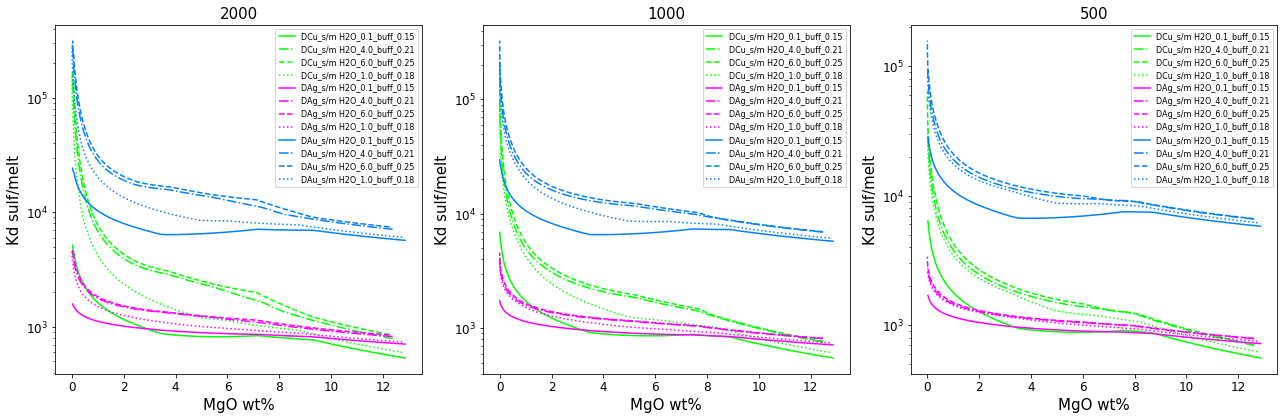

In [75]:
# Kd sulfide-melt 

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)


# Plotting OM dataset
category = om_piv.pressure_bar.unique()
subcat = ['DCu_s/m','DAg_s/m','DAu_s/m']
subsubcat = om_piv.newcolumn.unique()
numbers = list(range(1,4))
sub = zip(category, numbers)
subdict = dict(zip(subcat,distinctipy.get_colors(3)))
linedict = dict(zip(subsubcat, ['solid', 'dashdot', 'dashed','dotted']))

for c,num in sub:
    dfi = (om_piv[om_piv.pressure_bar == c])
    ax = fig.add_subplot(1,3,num)
 
    for i in subcat:
        dfh = dfi[dfi.Kd_sm == i]
        for j in subsubcat:
            fin = dfh[dfh.newcolumn == j]
            
            x = fin['MgO_Liq']
            y = fin['value']
            ax.plot(x,y, color=subdict[i], linestyle=linedict[j], label=i+' ' +j)
            ax.set_title(c, fontsize=15)
            ax.set_yscale('log')
        ax.set_xlabel('MgO wt%', fontsize=15)
        ax.set_ylabel('Kd sulf/melt', fontsize=15)
        ax.legend(fontsize=8)
        fig.tight_layout()


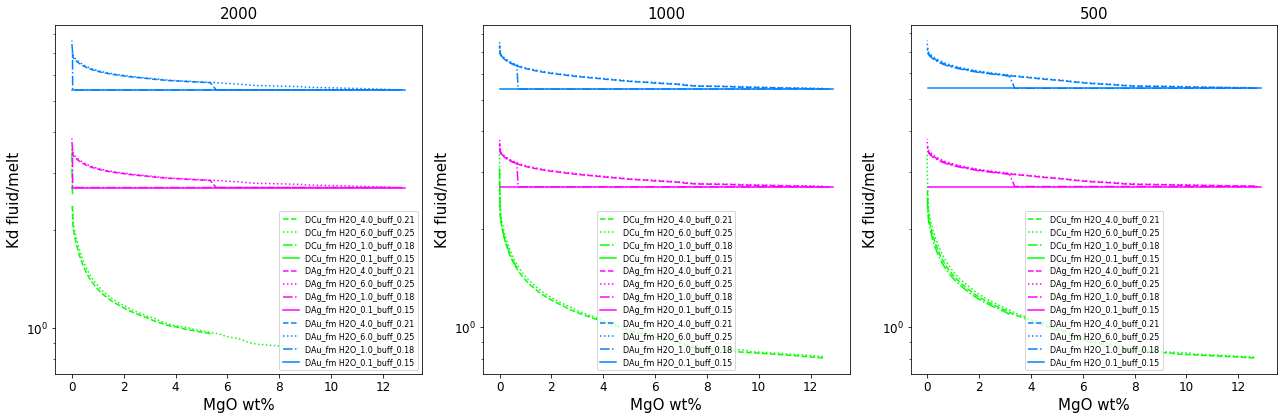

In [66]:
# Kd sulfide-melt 

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)


# Plotting OM dataset
category = om_fm_piv.pressure_bar.unique()
subcat = ['DCu_fm','DAg_fm','DAu_fm']
subsubcat = om_fm_piv.newcolumn.unique()
numbers = list(range(1,4))
sub = zip(category, numbers)
subdict = dict(zip(subcat,distinctipy.get_colors(3)))
linedict = dict(zip(subsubcat, ['dashed','dotted','dashdot', 'solid']))

for c,num in sub:
    dfi = (om_fm_piv[om_fm_piv.pressure_bar == c])
    ax = fig.add_subplot(1,3,num)
 
    for i in subcat:
        dfh = dfi[dfi.Kd_fm == i]
        for j in subsubcat:
            fin = dfh[dfh.newcolumn == j]
            
            x = fin['MgO_Liq']
            y = fin['value']
            ax.plot(x,y, color=subdict[i], linestyle=linedict[j], label=i+' ' +j)
            ax.set_title(c, fontsize=15)
            ax.set_yscale('log')
            
        ax.set_xlabel('MgO wt%', fontsize=15)
        ax.set_ylabel('Kd fluid/melt', fontsize=15)
        ax.legend(fontsize=8)
        fig.tight_layout()


In [67]:
ONEILL_df[['MgO_Liq','newcolumn','DCu_fm','DAg_fm','DAu_fm','DSe_fm','mCl', 'melt_Cl']]

,MgO_Liq,newcolumn,DCu_fm,DAg_fm,DAu_fm,DSe_fm,mCl,melt_Cl
0,12.863760,H2O_0.1_buff_0.15,NaN,2.700000,5.400000,50,0.000000,0.100000
1,12.654510,H2O_0.1_buff_0.15,NaN,2.700000,5.400000,50,0.000000,0.100594
2,12.446781,H2O_0.1_buff_0.15,NaN,2.700000,5.400000,50,0.000000,0.101187
3,12.241348,H2O_0.1_buff_0.15,NaN,2.700000,5.400000,50,0.000000,0.101776
4,12.038203,H2O_0.1_buff_0.15,NaN,2.700000,5.400000,50,0.000000,0.102361
...,...,...,...,...,...,...,...,...
1175,0.001554,H2O_6.0_buff_0.25,3.093908,3.705741,7.411483,50,0.251435,0.011108
1176,0.000508,H2O_6.0_buff_0.25,3.188281,3.728601,7.457203,50,0.257150,0.011081
1177,0.000085,H2O_6.0_buff_0.25,3.283302,3.751052,7.502105,50,0.262763,0.011056
1178,0.000003,H2O_6.0_buff_0.25,3.412324,3.780688,7.561377,50,0.270172,0.011024


## Overlay Yasur data: this study

In [76]:
# OU metals probe sims only match case
data = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/LA-ICP-MS/scripts_for_paper2/trace-metal-output.xlsx')

In [77]:
# whole rock metal
pubyas = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/LA-ICP-MS/scripts_for_paper2/naturaldata-output.xlsx')

In [78]:
# importing natural data vanuatu:
full_df = pd.read_excel('~/Documents/Cambridge_2020/Earth_Sciences/Databases/Vanuatu_WR_MI_mgcorr.xlsx', sheet_name='van_geochem')

# convert all to floats
full_df.iloc[:,14:29]= full_df.iloc[:,14:29].astype(float)
# normlaise anhydrous total
tot = full_df.Total
dfnorm = 100* full_df.iloc[:,14:26].div(tot, axis=0)

# Replace original oxide data with the normalised data
full_df.iloc[:,14:26] = dfnorm.values
vandat = full_df
vandat['Mg num'] = 100 * ((vandat['MgO']/40.31) / ((vandat['MgO']/40.31)+(vandat['FeOt']/71.844)))

#add total alkalis column: 
vandat['SiO2_LI'] = vandat['SiO2']/3
vandat['totalk'] = vandat['Na2O']+vandat['K2O']
vandat['LI'] = (vandat['SiO2_LI']+vandat['K2O'])-(vandat['CaO']+vandat['MgO']+vandat['FeO'])

# screen for yasur
yas_dat = (vandat[vandat.Island == 'Yasur'])
yas_dat.columns
yas_dat.Host.unique()

array([nan, 'ol', 'plag', 'cpx', 'apatite'], dtype=object)

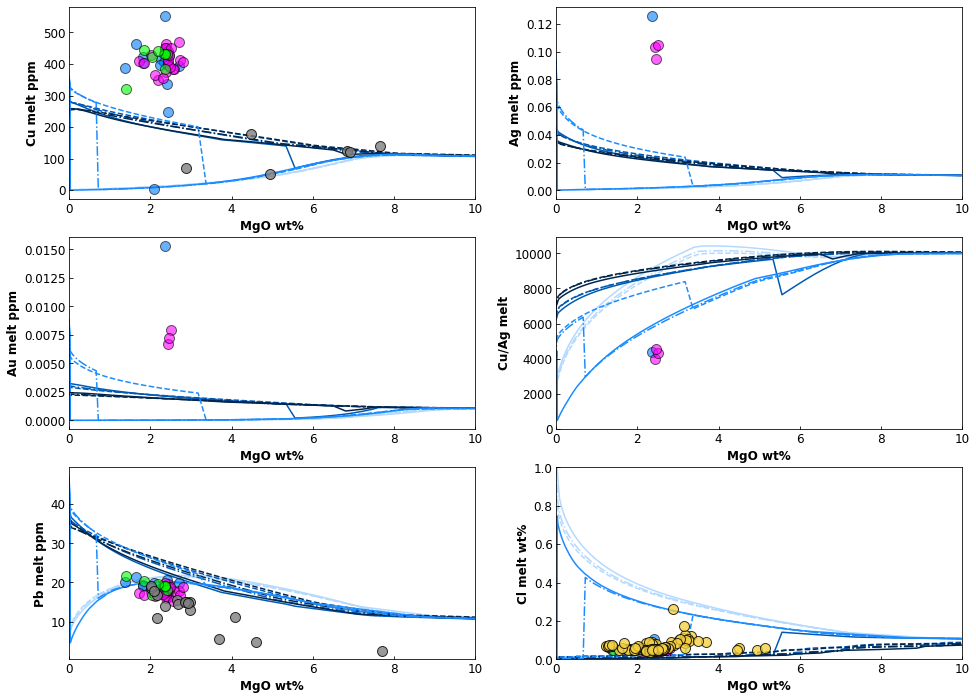

In [82]:
fig, ax = plt.subplots(3,2, sharex = False)
fig.set_figheight(12)
fig.set_figwidth(16)

# Model 
for v in ONEILL_df.newcolumn.unique():
    df_v = ONEILL_df[ONEILL_df.newcolumn == v]
    df_j = JUGO_df[JUGO_df.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        df_jp = df_j[df_j.pressure_bar == p]
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['melt_Cu'], color=om_dict[v], label=v, linestyle=pdict[p],zorder=1)
        ax[0,1].plot(x, df_vp['melt_Ag'], color=om_dict[v], label=v, linestyle=pdict[p],zorder=1)
        ax[1,0].plot(x, df_vp['melt_Au'], color=om_dict[v], label=v, linestyle=pdict[p],zorder=1)
        ax[1,1].plot(x, df_vp['CuAg'], color=om_dict[v], label=v, linestyle=pdict[p],zorder=1)
        ax[2,0].plot(x, df_vp['melt_Pb'], color=om_dict[v], label=v, linestyle=pdict[p],zorder=1)
        ax[2,1].plot(x, (df_vp['melt_Cl']), color=om_dict[v], label=v, linestyle=pdict[p],zorder=1)
    

#Natural Data         
host = ['ol', 'cpx', 'plag']
symb = ['o', 'o', 'o']
symbmap = dict(zip(host, symb))
scalarMap_ol_2 = {'T1_scoria': (0.0, 1.0, 0.0), 'T2_scoria': (1.0, 0.0, 1.0), 'T3_scoria': (0.0, 0.5, 1.0)}
min_dict_ol = {'ol': 'o', 'plag': 's', 'cpx': 'D'} 
category = ['Cu','Ag','Au','Cu/Ag', 'Pb', 'Cl']

for i in data.Sample_grouped.unique():
    dat = data[data.Sample_grouped == i]
    x = dat.MgO
    ax[0,0].scatter(x, dat['Cu'], color=scalarMap_ol_2[i],alpha=0.6, edgecolor='k',s=100, label=data['Sample_sims'])
    ax[0,1].scatter(x, dat['Ag'], color=scalarMap_ol_2[i],alpha=0.6, edgecolor='k',s=100, label=data['Sample_sims'])
    ax[1,0].scatter(x, dat['Au'], color=scalarMap_ol_2[i],alpha=0.6, edgecolor='k',s=100, label=data['Sample_sims'])
    ax[1,1].scatter(x, dat['Cu/Ag'], color=scalarMap_ol_2[i],alpha=0.6, edgecolor='k',s=100, label=data['Sample_sims'])
    ax[2,0].scatter(x, dat['Pb'], color=scalarMap_ol_2[i],alpha=0.6, edgecolor='k',s=100, label=i)
    ax[2,1].scatter(x, (dat['Cl']), color=scalarMap_ol_2[i],alpha=0.6, edgecolor='k',s=100, label=data['Sample_sims'])
    #ax[2,0].legend()
#Natural Data         
host = ['ol', 'cpx', 'plag']
symb = ['o', 'o', 'o']
symbmap = dict(zip(host, symb))
df_wr = (pubyas[pubyas.Data_Type == 'WR'])
x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['Cu'], color='grey', marker='o', s=100, alpha=0.8, zorder=1, edgecolors='black', label='WR')
ax[2,0].scatter(x, df_wr['Pb'], color='grey',marker='o', s=100, alpha=0.8, zorder=1, edgecolors='black', label='WR')
ax[2,1].scatter(x, (df_wr['Cl (ppm)']), color='grey',marker='o', s=100, alpha=0.8, zorder=1, edgecolors='black', label='WR')
#ax[2,0].legend()

#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['Cu'], color='#f5d142', marker='o', s=100, alpha=0.8, zorder=1, edgecolors='black', label='MI')
    ax[2,0].scatter(x, dfhost['Pb'], color='#f5d142',marker='o', s=100, alpha=0.8, zorder=1, edgecolors='black', label='MI')
    ax[2,1].scatter(x, (dfhost['Cl (ppm)']/10000), color='#f5d142',marker='o', s=100, alpha=0.8, zorder=1, edgecolors='black', label='MI')
    #ax[2,0].legend()
    
ax = ax.flatten()
for i in range(6):
    ax[i].tick_params(axis='both', which='both', labelsize=12, direction='in')
    ax[i].set_xlim(0,10)
    ax[i].set_xlabel('MgO wt%', fontsize=12,weight='bold')
    if i == 0:
        ax[i].set_ylabel('Cu melt ppm', fontsize=12, weight='bold')
    if i == 1:
        ax[i].set_ylabel('Ag melt ppm', fontsize=12, weight='bold')

    if i == 2:
        ax[i].set_ylabel('Au melt ppm', fontsize=12, weight='bold')
    if i == 3:
        ax[i].set_ylabel('Cu/Ag melt', fontsize=12, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Pb melt ppm', fontsize=12, weight='bold')
    if i == 5:
        ax[i].set_ylabel('Cl melt wt%', fontsize=12, weight='bold')
        ax[i].set_ylim(0,1)
   

In [ ]:
vandat['Cl (ppm)']